CSDA 1050 Sprint 1-What is the marginal difference in rent price between tenured renters and new renters in Toronto?


Nickolas Lal 

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import xlrd
from matplotlib import pyplot as plt

In [2]:
pwd

'C:\\Users\\nick'

In [3]:
cd C:\Users\nick\Documents\Certificate in Big Data Analytics and Certificate in Predictive Analytics\Certificate in Predictive Analytics\CSDA 1050\Datasets

C:\Users\nick\Documents\Certificate in Big Data Analytics and Certificate in Predictive Analytics\Certificate in Predictive Analytics\CSDA 1050\Datasets


In [6]:
#Loading the various CSV data files
Income = pd.read_csv("Toronto Income.csv")
Income.head(5)

,Year,Age group,UOM,Average Income,Median Income
0,2013,16 years and over,2017 constant dollars,"$44,900.00","$30,900.00"
1,2014,16 years and over,2017 constant dollars,"$45,700.00","$31,600.00"
2,2015,16 years and over,2017 constant dollars,"$46,100.00","$30,500.00"
3,2016,16 years and over,2017 constant dollars,"$47,600.00","$31,500.00"
4,2017,16 years and over,2017 constant dollars,"$48,500.00","$33,600.00"


In [4]:
TorontoRent = pd.read_csv("Toronto Average Rent Prices.csv")
TorontoRent.head(5)

,Year,Bachelor,BachelorChange,OneBedroom,OneBedroomChange,TwoBedroom,TwoBedroomChange,ThreeBedroomPlus,ThreeBedroomChange,CityAverage,CityAverageChange
0,2000,685,NaN,833,NaN,984,NaN,1186,NaN,907,7.50
1,2001,698,1.90,870,4.44,1039,5.59,1248,5.23,951,4.85
2,2002,733,5.01,894,2.76,1055,1.54,1279,2.48,976,2.63
3,2003,734,0.14,884,-1.12,1045,-0.95,1225,-4.22,961,-1.54
4,2004,730,-0.54,888,0.45,1061,1.53,1263,3.10,973,1.25


In [5]:
HouseholdIncome = gpd.read_file("Household Income.shp")
print("HouseholdIncome")
HouseholdIncome.head(5)

HouseholdIncome


,spatial_id,name,VALUE0,geometry
0,3520005,"Toronto, ON (CSD)",51415.0,"POLYGON ((-79.1520235957221 43.81438746510226,..."


In [7]:
Guidelines = pd.read_csv("Rent Increase Guidelines.csv")
Guidelines.head(5)

,Year,Guideline,InflationRate,Difference
0,1991,5.4,3.75,1.65
1,1992,6.0,2.17,3.83
2,1993,4.9,1.65,3.25
3,1994,3.2,0.23,2.97
4,1995,2.9,1.74,1.16


In [8]:
CPI = pd.read_csv("Inflation Rate Canada.csv")
CPI.head(5)

,Year,Inflation Rate
0,1984,3.72
1,1985,4.40
2,1986,4.21
3,1987,4.19
4,1988,3.88


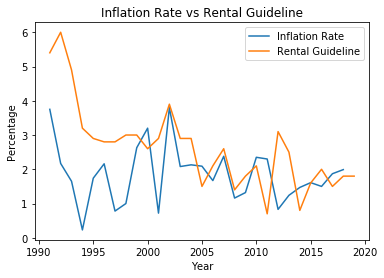

In [9]:
#Let's looks at the exploratory analysis
#Compare Inflation rate with rental increase guidelines,here we can see that generally the rent increase is always larger than inflation although there have been a vew occastions where it was smaller.
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.plot(Guidelines.Year,Guidelines.Guideline)
plt.title("Inflation Rate vs Rental Guideline")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["Inflation Rate", "Rental Guideline"])
plt.show()

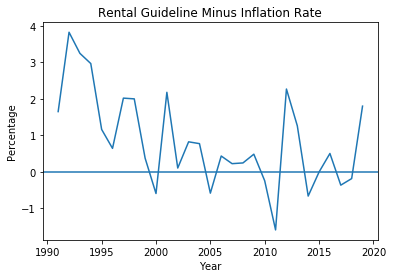

In [10]:
# A better visualization of the gap in the rental increase guidelines vs the inflation rate by plotting the difference, Guideline-Inflation rate.
# Here we can better see that the rental guideline rate is usually higher, and occasionally lower or equal to the inflation rate.
plt.plot(Guidelines.Year,Guidelines.Difference)
plt.title("Rental Guideline Minus Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.axhline([0])
plt.show()

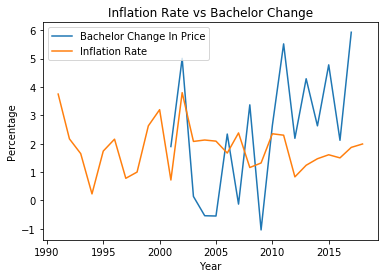

In [11]:
#Compare Inflation rate with the change in price in each type of dwelling, starting with Bachelor change 
#Here we can see that the the Bachelor change in price is almost always greater than the rate of Inflation...
#besides a few exceptions where Inflation is equal to or lower than the Bachelor change(roughly 2002-early 2006,late 2007-2008, 2009-early 2010)
plt.plot(TorontoRent.Year,TorontoRent.BachelorChange)
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.title("Inflation Rate vs Bachelor Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["Bachelor Change In Price","Inflation Rate"])
plt.show()

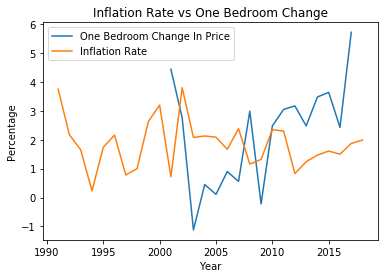

In [12]:
#Comparing Inflation Rate with the change in price of One bedroom apartments
#Here we can see that the Inflation Rate was greater from about 2001-2008 and 2009-2010 and it was smaller otherwise
#There is also a sharp increase in the change in price from about 2015 onwards.
plt.plot(TorontoRent.Year,TorontoRent.OneBedroomChange)
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.title("Inflation Rate vs One Bedroom Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["One Bedroom Change In Price","Inflation Rate"])
plt.show()

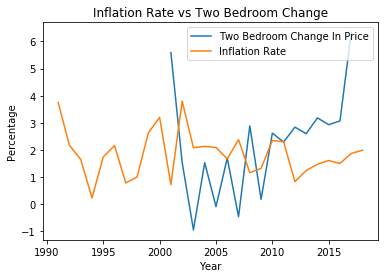

In [13]:
#Comparing Inflation Rate with the change in price of Two bedroom apartments
#Here we can see there were many sharp increases and decreases in the change of price between 2001 and 2010
#We can also see the Inflation Rate was greater from about 2001-2008 and 2009-2010 and it was smaller otherwise. 
#There is also a sharp increase in the change in price from about 2015 onwards.
plt.plot(TorontoRent.Year,TorontoRent.TwoBedroomChange)
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.title("Inflation Rate vs Two Bedroom Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["Two Bedroom Change In Price","Inflation Rate"])
plt.show()

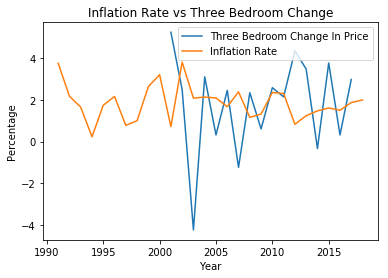

In [14]:
#Comparing Inflation Rate with the change in price of Three bedroom apartments
#Here we can see there were many sharp increases and decreases in the change of price throughout, the biggest being the drop in 2003.
#Aside from a few exceptions we can see the Inflation Rate was greater or roughly the same from about 2003-2010. 
#Aside from a few exceptions from about 2010 the Inflation rate was smaller.
plt.plot(TorontoRent.Year,TorontoRent.ThreeBedroomChange)
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.title("Inflation Rate vs Three Bedroom Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["Three Bedroom Change In Price","Inflation Rate"])
plt.show()

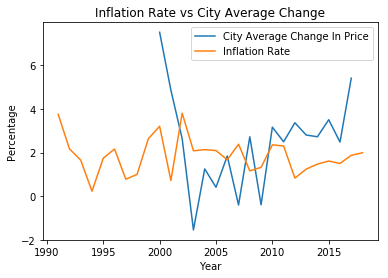

In [15]:
#Comparing Inflation Rate with the change in price of the city average
#Here we can see there were some sharp flucuations in the change of price between 2001 and 2011
#We can also see the Inflation Rate was greater from about 2001-2007 and 2009-2010. It was smaller otherwise. 
#There is also a steep increase in the change in price from about 2015 onwards.
plt.plot(TorontoRent.Year,TorontoRent.CityAverageChange)
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.title("Inflation Rate vs City Average Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["City Average Change In Price","Inflation Rate"])
plt.show()

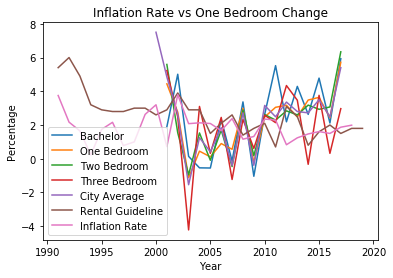

In [16]:
#Now plotting them all together to compare and get a visual on each individual condo type alongside the city average, guideline and inflation.
plt.plot(TorontoRent.Year,TorontoRent.BachelorChange)
plt.plot(TorontoRent.Year,TorontoRent.OneBedroomChange)
plt.plot(TorontoRent.Year,TorontoRent.TwoBedroomChange)
plt.plot(TorontoRent.Year,TorontoRent.ThreeBedroomChange)
plt.plot(TorontoRent.Year,TorontoRent.CityAverageChange)
plt.plot(Guidelines.Year,Guidelines.Guideline)
plt.plot(Guidelines.Year,Guidelines.InflationRate)
plt.title("Inflation Rate vs One Bedroom Change")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(["Bachelor","One Bedroom","Two Bedroom","Three Bedroom","City Average","Rental Guideline","Inflation Rate"])
plt.show()